In [1]:
import os
from os.path import dirname
import numpy as np
from scipy.signal import find_peaks
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import seaborn as sns

sns.set(color_codes=True, style="white")
pd.options.mode.chained_assignment = None  # default='warn'

threshold_max_d_anytwo_nm = 200  # unit: um
label_1 = "20 nm beads"
label_2 = "200 nm beads"
color_1 = "#9a3324"
color_2 = "#333232"
palette = [color_1, color_2]

postfix = "20vs200nmbeads_in_buffer.png"

folder_save = "/Volumes/lsa-nwalter/Guoming_Gao_turbo/Walterlab_server/PROCESSED_DATA/RNA-diffusion-in-FUS/RNAinFUS_PaperFigures/Fig2_diffusion analysis/beads_and_RNA_control/"
fname_AIO_1 = "SPT_results_AIO_concat-20nm_beads_in_buffer.csv"
fname_AIO_2 = "SPT_results_AIO_concat-200nm_beads_in_buffer.csv"
fname_saspt_1 = "saSPT-pooled-mobile-20nm_beads_in_buffer.csv"
fname_saspt_2 = "saSPT-pooled-mobile-200nm_beads_in_buffer.csv"

## Combine dataframes

In [2]:
os.chdir(folder_save)

df1 = pd.read_csv(fname_AIO_1)
df2 = pd.read_csv(fname_AIO_2)

df1.insert(0, "label", np.repeat(label_1, df1.shape[0]))
df2.insert(0, "label", np.repeat(label_2, df2.shape[0]))

# Below sequence is important for the layer order
df_AIO = pd.concat([df1, df2], ignore_index=True)

In [3]:
df1 = pd.read_csv(fname_saspt_1, dtype=float)
df2 = pd.read_csv(fname_saspt_2, dtype=float)


def extract_log10D_density(df_current_file):
    range_D = df_current_file["diff_coef"].unique()
    log10D_density = []
    for log10D in range_D:
        df_current_log10D = df_current_file[df_current_file["diff_coef"] == log10D]
        log10D_density.append(df_current_log10D["mean_posterior_occupation"].sum())

    df_toplot = pd.DataFrame(
        {"log10D": np.log10(range_D), "Probability": log10D_density}, dtype=float
    )

    return df_toplot


df_saspt_1 = extract_log10D_density(df1)
df_saspt_2 = extract_log10D_density(df2)

df_saspt_1.insert(0, "label", np.repeat(label_1, df_saspt_1.shape[0]))
df_saspt_2.insert(0, "label", np.repeat(label_2, df_saspt_2.shape[0]))

# Below sequence is important for the layer order
df_saspt = pd.concat([df_saspt_1, df_saspt_2], ignore_index=True)

# Plots

### Localization error

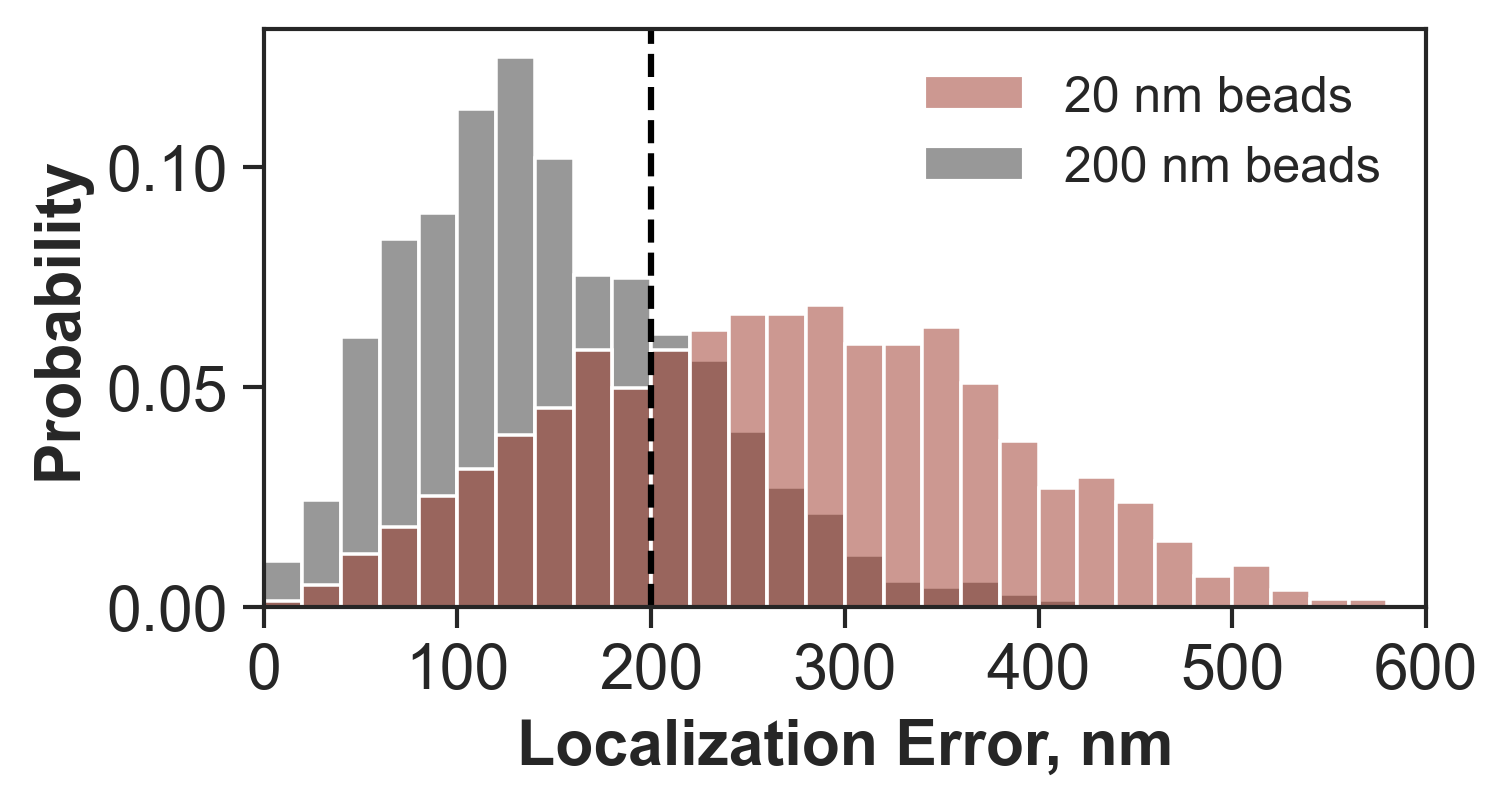

20 nm beads 3139
200 nm beads 2913


In [4]:
data = df_AIO[df_AIO["max_d_anytwo_nm"] > threshold_max_d_anytwo_nm]
data = data[data["linear_fit_R2"] > 0.7]
# quantile = np.quantile(df_AIO["linear_fit_sigma"].dropna().to_numpy(), 0.999)
plt.figure(figsize=(5, 2.5), dpi=300)
ax = sns.histplot(
    data=data,
    x="linear_fit_sigma",
    hue="label",
    palette=palette,
    bins=30,
    binrange=(0, 600),
    stat="probability",
    common_norm=False,
    alpha=0.5,
)
sns.move_legend(ax, 0, title=None, frameon=False, fontsize=12)
plt.axvline(threshold_max_d_anytwo_nm, ls="--", color="black")
plt.xlim(0, 600)
plt.xlabel("Localization Error, nm", weight="bold", fontsize=15)
plt.ylabel("Probability", weight="bold", fontsize=15)
plt.gca().spines[:].set_linewidth(1)
plt.gca().tick_params(
    axis="both",
    which="major",
    labelsize=15,
    direction="out",
    bottom=True,
    left=True,
    length=5,
    width=1,
)

plt.gca().tick_params(axis="both", which="major", labelsize=15)
plt.savefig("1.LocError_histo_" + postfix, format="png", bbox_inches="tight")
plt.show()
print(label_1, data[data["label"] == label_1].shape[0])
print(label_2, data[data["label"] == label_2].shape[0])

### Maximum Distance (whether static molecule)

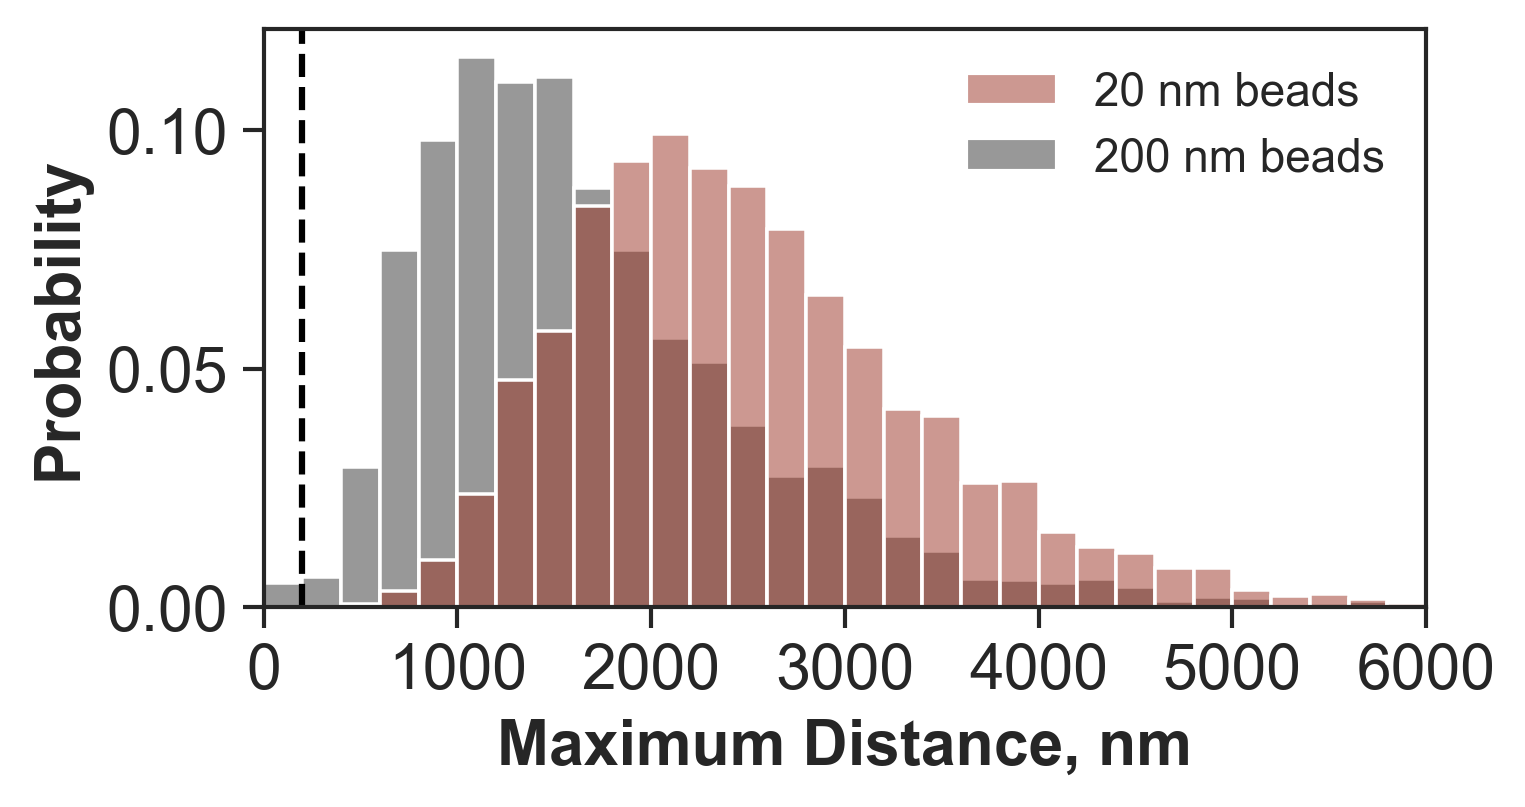

20 nm beads 3139
200 nm beads 2913


In [5]:
plt.figure(figsize=(5, 2.5), dpi=300)
ax = sns.histplot(
    data=df_AIO,
    x="max_d_anytwo_nm",
    hue="label",
    palette=palette,
    bins=30,
    stat="probability",
    common_norm=False,
    binrange=(0, 6000),
    # kde=True,
    # kde_kws={"bw_adjust": 1},
    # line_kws={"lw": 3},
    alpha=0.5,
)
plt.xlim(0, 6000)
sns.move_legend(ax, 0, title=None, frameon=False)
plt.axvline(threshold_max_d_anytwo_nm, ls="--", color="black")
plt.xlabel("Maximum Distance, nm", weight="bold", fontsize=15)
plt.ylabel("Probability", weight="bold", fontsize=15)
plt.gca().spines[:].set_linewidth(1)
plt.gca().tick_params(
    axis="both",
    which="major",
    labelsize=15,
    direction="out",
    bottom=True,
    left=True,
    length=5,
    width=1,
)

plt.gca().tick_params(axis="both", which="major", labelsize=15)
plt.savefig("2.max_d_anytwo_nm_histo_" + postfix, format="png", bbox_inches="tight")
plt.show()
print(label_1, data[data["label"] == label_1].shape[0])
print(label_2, data[data["label"] == label_2].shape[0])

### alpha distribution

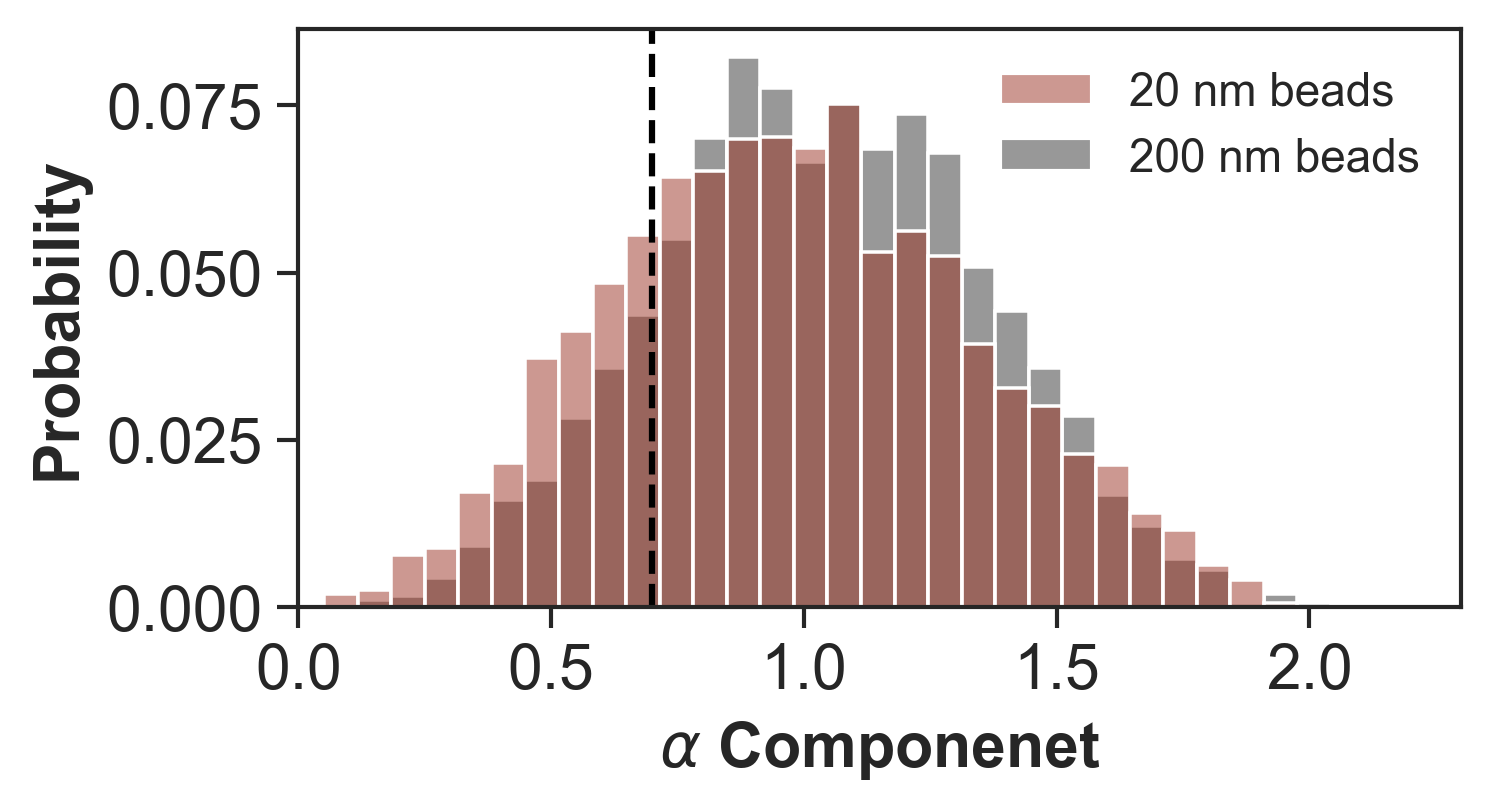

20 nm beads 3203
200 nm beads 3052


In [6]:
plt.figure(figsize=(5, 2.5), dpi=300)
data = df_AIO[df_AIO["max_d_anytwo_nm"] > threshold_max_d_anytwo_nm]
data = data[data["loglog_fit_R2"] > 0.7]
data = data[data["alpha"] > 0]
ax = sns.histplot(
    data=data,
    x="alpha",
    hue="label",
    palette=palette,
    bins=30,
    stat="probability",
    common_norm=False,
    # binrange=(0, data["alpha"].max()),
    # kde=True,
    # kde_kws={"bw_adjust": 1.5},
    # line_kws={"lw": 3},
    alpha=0.5,
)
sns.move_legend(ax, 0, title=None, frameon=False)
plt.axvline(0.7, ls="--", color="black")
plt.xlim(0, 2.3)
plt.xlabel(r"$\alpha$ Componenet", weight="bold", fontsize=15)
plt.ylabel("Probability", weight="bold", fontsize=15)
plt.gca().spines[:].set_linewidth(1)
plt.gca().tick_params(
    axis="both",
    which="major",
    labelsize=15,
    direction="out",
    bottom=True,
    left=True,
    length=5,
    width=1,
)

plt.gca().tick_params(axis="both", which="major", labelsize=15)
plt.savefig("3.alpha_histo_" + postfix, format="png", bbox_inches="tight")
plt.show()
print(label_1, data[data["label"] == label_1].shape[0])
print(label_2, data[data["label"] == label_2].shape[0])

### Angle Distribution

In [7]:
lst_angle = []
lst_label = []
for _, row in df_AIO[df_AIO["max_d_anytwo_nm"] > 200].iterrows():
    angles = np.fromstring(
        row["list_of_angles"][1:-1],
        dtype=float,
        sep=", ",
    )
    labels = np.repeat(row["label"], angles.shape[0])
    lst_angle.extend(angles)
    lst_label.extend(labels)

In [8]:
data = pd.DataFrame(
    {
        "angle": np.abs(lst_angle),
        "label": lst_label,
    },
    dtype=object,
)

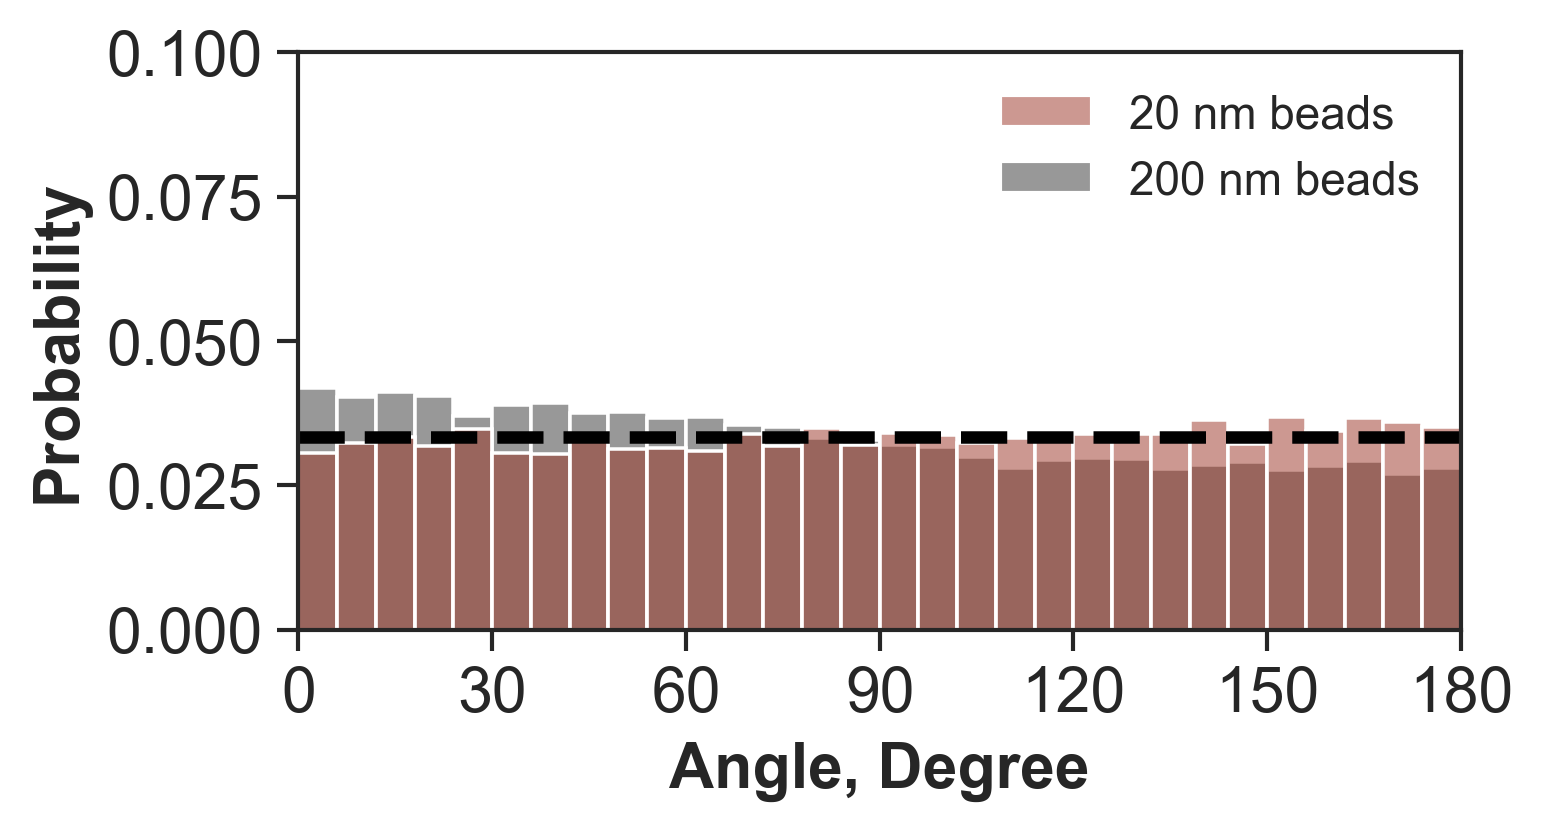

In [9]:
plt.figure(figsize=(5, 2.5), dpi=300)
bins = 30
ax = sns.histplot(
    data=data,
    x="angle",
    hue="label",
    palette=palette,
    bins=bins,
    stat="probability",
    common_norm=False,
    binrange=(0, 180),
    alpha=0.5,
)
sns.move_legend(ax, 0, title=None, frameon=False)
plt.axhline(1 / bins, color="black", ls="--", lw=3)
plt.xlim(0, 180)
plt.xticks([0, 30, 60, 90, 120, 150, 180])
plt.ylim(0, 0.1)
plt.xlabel("Angle, Degree", weight="bold", fontsize=15)
plt.ylabel("Probability", weight="bold", fontsize=15)
plt.gca().spines[:].set_linewidth(1)
plt.gca().tick_params(
    axis="both",
    which="major",
    labelsize=15,
    direction="out",
    bottom=True,
    left=True,
    length=5,
    width=1,
)

plt.gca().tick_params(axis="both", which="major", labelsize=15)
plt.savefig("4.angle_histo_" + postfix, format="png", bbox_inches="tight")
plt.show()

### D distribution among the non contrained molecules

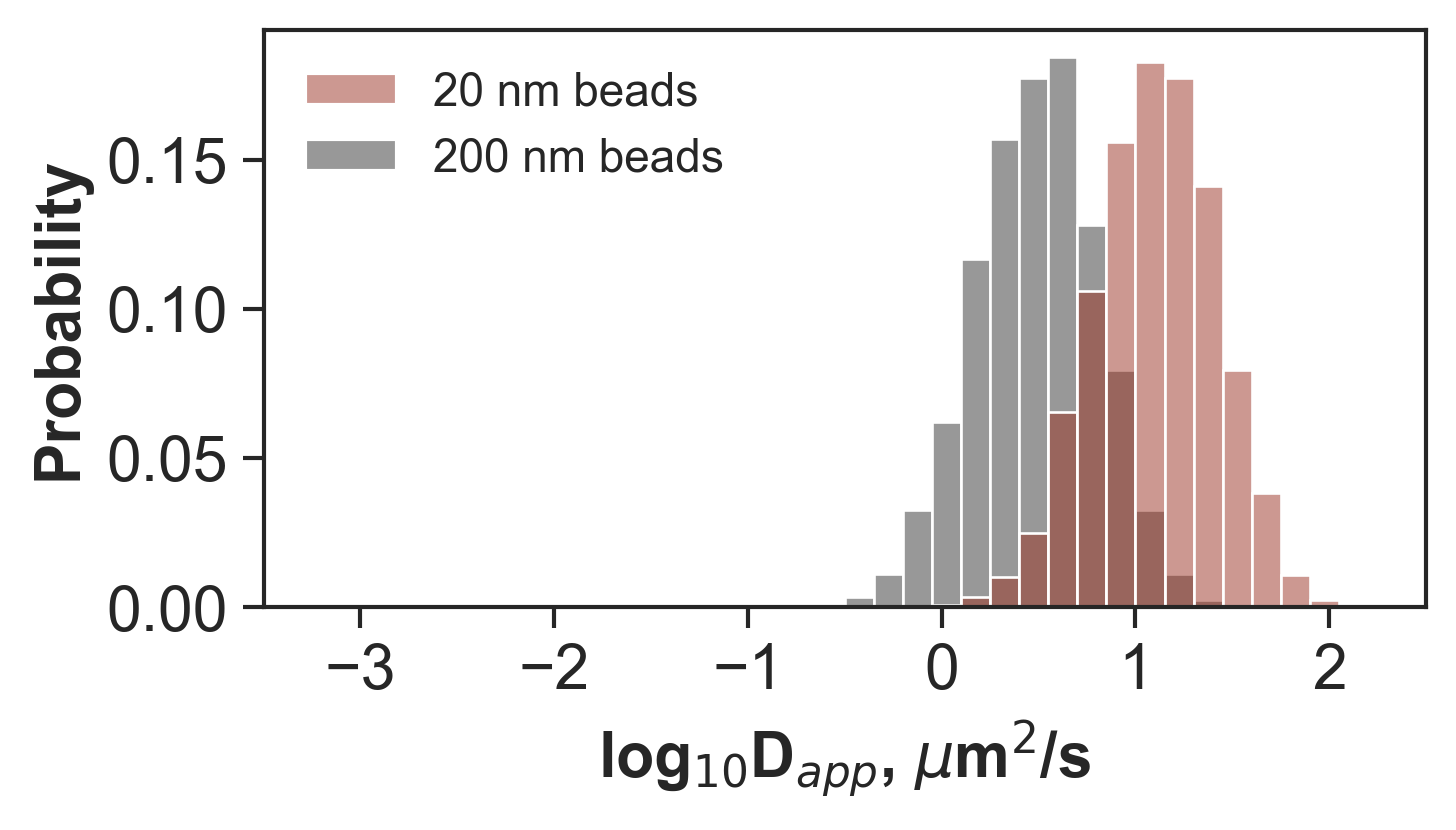

20 nm beads 2846
200 nm beads 2803


In [10]:
data = df_AIO[df_AIO["linear_fit_R2"] > 0.7]
data = data[data["max_d_anytwo_nm"] > threshold_max_d_anytwo_nm]
data = data[data["alpha"] > 0.5]
plt.figure(figsize=(5, 2.5), dpi=300)
ax = sns.histplot(
    data=data,
    x="linear_fit_log10D",
    hue="label",
    palette=palette,
    bins=40,
    stat="probability",
    common_norm=False,
    # kde=True,
    # kde_kws={"bw_adjust": 1.5},
    # line_kws={"lw": 3},
    binrange=(-3.5, 2.5),
    alpha=0.5,
)
sns.move_legend(ax, 2, title=None, frameon=False)
plt.xlim(-3.5, 2.5)
plt.xlabel(r"log$_{10}$D$_{app}$, $\mu$m$^2$/s", weight="bold", fontsize=15)
plt.ylabel("Probability", weight="bold", fontsize=15)
plt.gca().spines[:].set_linewidth(1)
plt.gca().tick_params(
    axis="both",
    which="major",
    labelsize=15,
    direction="out",
    bottom=True,
    left=True,
    length=5,
    width=1,
)
plt.gca().tick_params(axis="both", which="major", labelsize=15)
plt.savefig("5.ApparentD_linear_histo_" + postfix, format="png", bbox_inches="tight")
plt.show()
print(label_1, data[data["label"] == label_1].shape[0])
print(label_2, data[data["label"] == label_2].shape[0])

### Plot saSPT

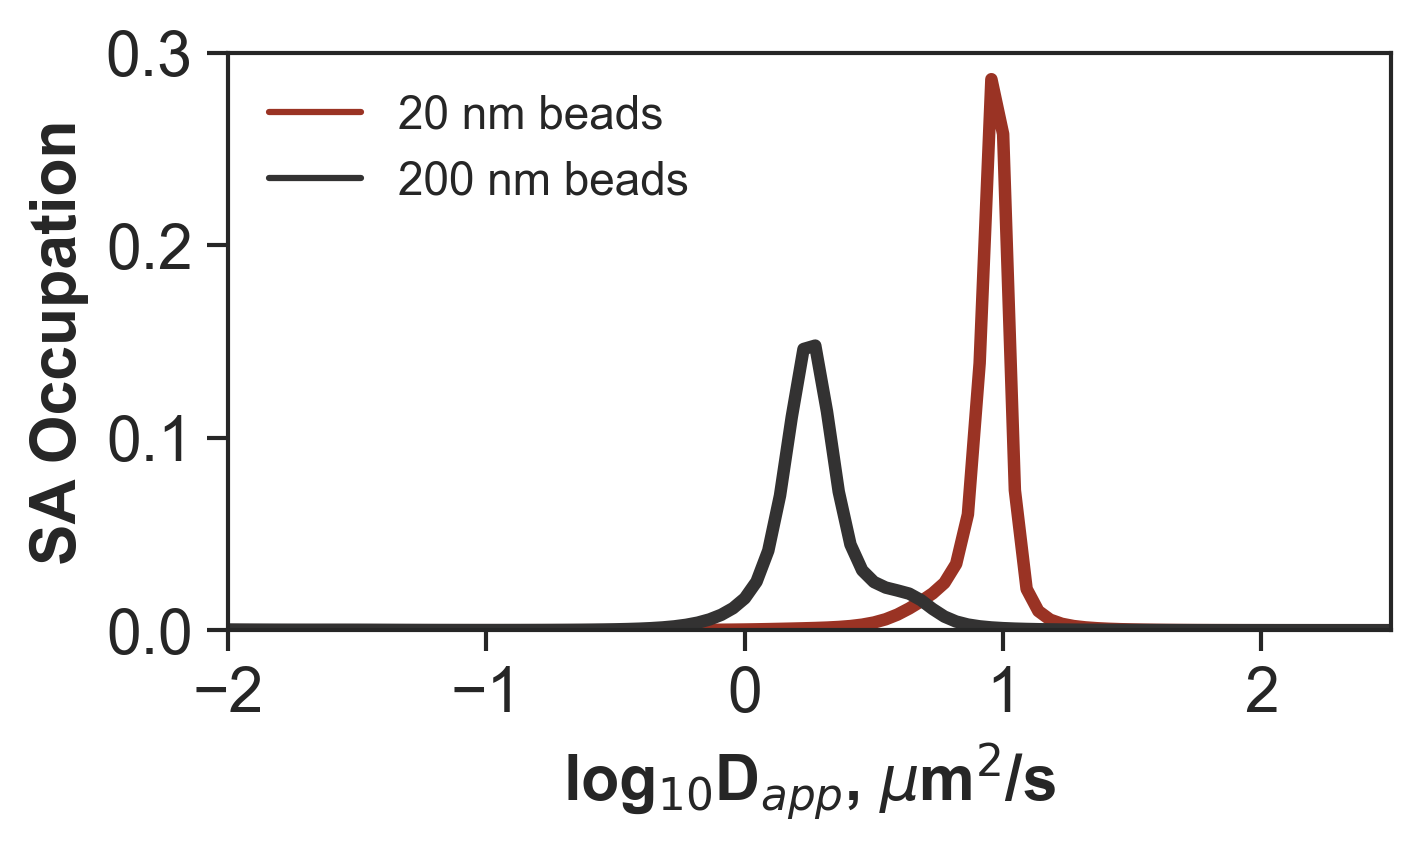

In [11]:
plt.figure(figsize=(5, 2.5), dpi=300)
ax = sns.lineplot(
    data=df_saspt,
    x="log10D",
    y="Probability",
    hue="label",
    palette=palette,
    lw=3,
)
# find peaks
log10D = df_saspt[df_saspt["label"] == label_1]["log10D"].to_numpy(dtype=float)
proportion = df_saspt[df_saspt["label"] == label_1]["Probability"].to_numpy(dtype=float)
# peaks_idx, _ = find_peaks(proportion)
# for x in log10D[peaks_idx]:
#     plt.axvline(x, color=color_1, ls="--", lw=1, alpha=0.5)

log10D = df_saspt[df_saspt["label"] == label_2]["log10D"].to_numpy(dtype=float)
proportion = df_saspt[df_saspt["label"] == label_2]["Probability"].to_numpy(dtype=float)
# peaks_idx, _ = find_peaks(proportion)
# for x in log10D[peaks_idx]:
#     plt.axvline(x, color=color_2, ls="--", lw=1, alpha=0.5)

sns.move_legend(ax, 2, title=None, frameon=False)
plt.xlim(log10D.min(), log10D.max())
plt.ylim(0, 0.3)
plt.xlabel(r"log$_{10}$D$_{app}$, $\mu$m$^2$/s", weight="bold", fontsize=15)
plt.ylabel("SA Occupation", weight="bold", fontsize=15)
plt.gca().spines[:].set_linewidth(1)
plt.gca().tick_params(
    axis="both",
    which="major",
    labelsize=15,
    direction="out",
    bottom=True,
    left=True,
    length=5,
    width=1,
)
plt.gca().tick_params(axis="both", which="major", labelsize=15)
plt.savefig("6.saspt_histo_" + postfix, format="png", bbox_inches="tight")
plt.show()

### Fitting R2 of all mobile molecules

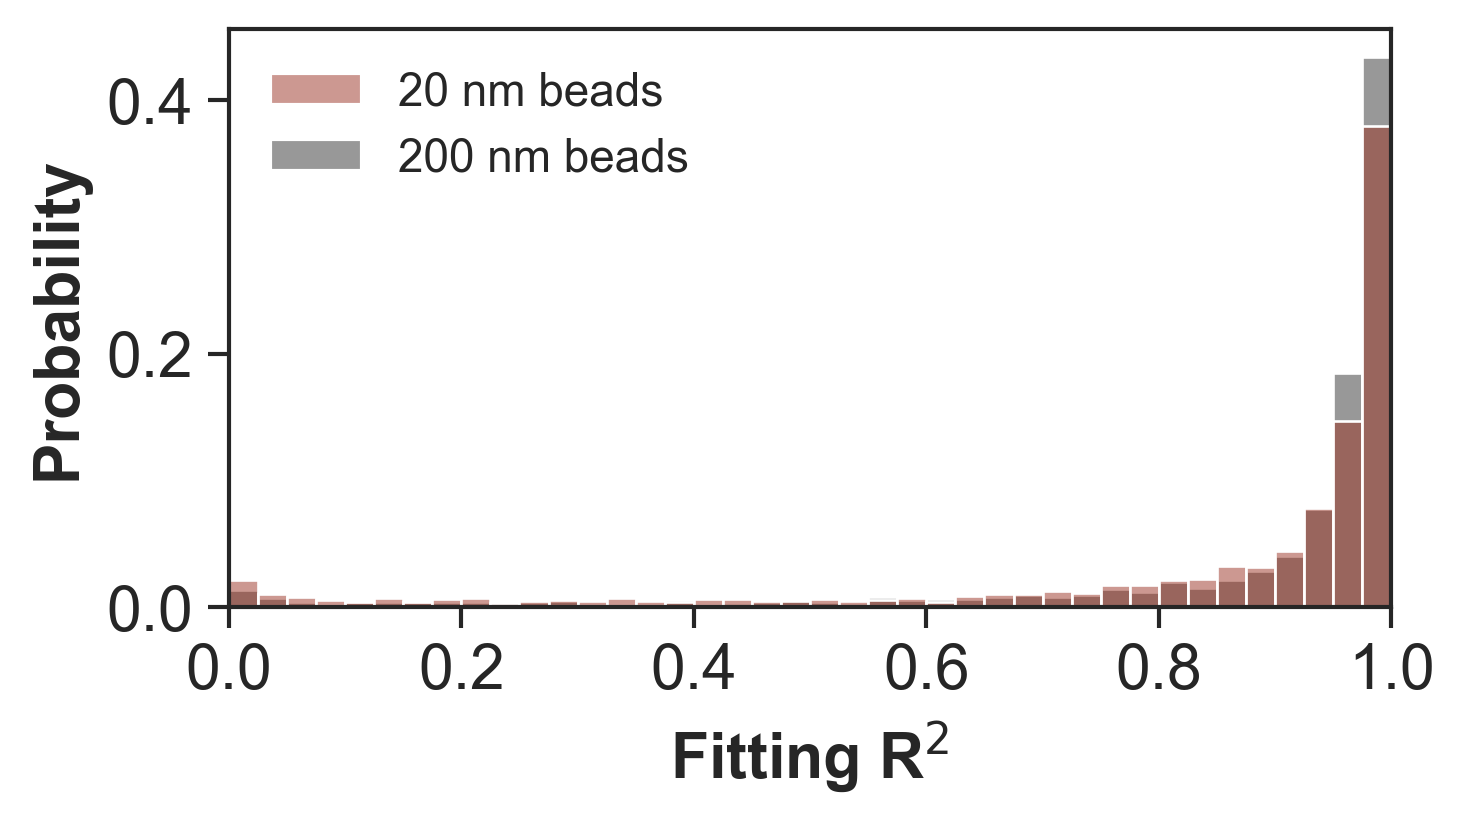

20 nm beads 3854
200 nm beads 3366


In [12]:
data = df_AIO[df_AIO["max_d_anytwo_nm"] > threshold_max_d_anytwo_nm]
plt.figure(figsize=(5, 2.5), dpi=300)
ax = sns.histplot(
    data=data,
    x="linear_fit_R2",
    hue="label",
    palette=palette,
    bins=40,
    stat="probability",
    common_norm=False,
    binrange=(0, 1),
)
sns.move_legend(ax, 0, title=None, frameon=False)
plt.xlim(0, 1)
plt.xlabel(r"Fitting R$^2$", weight="bold", fontsize=15)
plt.ylabel("Probability", weight="bold", fontsize=15)
plt.gca().spines[:].set_linewidth(1)
plt.gca().tick_params(
    axis="both",
    which="major",
    labelsize=15,
    direction="out",
    bottom=True,
    left=True,
    length=5,
    width=1,
)
plt.savefig("SM1.fitting_R2_histo_" + postfix, format="png", bbox_inches="tight")
plt.show()
print(label_1, data[data["label"] == label_1].shape[0])
print(label_2, data[data["label"] == label_2].shape[0])